---
<center>
<h3 style="font-size: 50px; font-family: serif;"><b>Traffic Accident Impact</b></h3>
Achille NGUESSIE
</center>

---

### *About the Dataset*
<h4>This dataset is a compilation of car accidents across 49 states in the USA, spanning from February 2016 to March 2023. It's sourced from diverse APIs capturing real-time traffic incident data. These APIs gather information from entities such as transportation departments, law enforcement, traffic cameras, and road sensors. The dataset holds around 7.7 million accident records. For further details on this dataset, additional information can be found <a href="https://smoosavi.org/datasets/us_accidents">here</a>.</h4>

---

In [1]:
from traffic_accident_impact.utils import *
from traffic_accident_impact.config import *

import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

%load_ext autoreload
%autoreload 2
%matplotlib inline

2025-03-24 17:55:32.717 | INFO     | traffic_accident_impact.config:<module>:11 - PROJ_ROOT path is: C:\Users\Achille Nguessie\Desktop\Projects\2024\traffic-accident-impact


<i>This work embarks on an exploration of US accidents. The goal is to predict the impact of traffic accidents on traffic flow by forecasting their duration. By providing accurate predictions, the project aims to enable quicker and more effective decision-making, thereby enhancing road safety and streamline traffic regulation during accident scenarios
</i>

## 1. Features Description
<span id="inf1"></span>
This dataset comprises of 46 columns and 7,728,394 rows

| Features                | Meaning                                                                                      |
|-------------------------|----------------------------------------------------------------------------------------------|
| **ID**                  | This is a unique identifier of the accident record.                                          |
| **Source**              | Source of raw accident data.                                                                |
| **Severity**            | Severity of the accident, from 1 (least impact) to 4 (significant impact on traffic).        |
| **Start_Time**          | Start time of the accident in local time zone.                                               |
| **End_Time**            | End time when the impact of the accident on traffic flow was dismissed.                      |
| **Start_Lat**           | Latitude in GPS coordinate of the start point.                                               |
| **Start_Lng**           | Longitude in GPS coordinate of the start point.                                              |
| **End_Lat**             | Latitude in GPS coordinate of the end point.                                                 |
| **End_Lng**             | Longitude in GPS coordinate of the end point.                                                |
| **Distance(mi)**        | Length of the road extent affected by the accident in miles.                                 |
| **Description**         | Human-provided description of the accident.                                                  |
| **Street**              | Street name in the address field.                                                            |
| **City**                | City in the address field.                                                                  |
| **County**              | County in the address field.                                                                |
| **State**               | State in the address field.                                                                 |
| **Zipcode**             | Zipcode in the address field.                                                              |
| **Country**             | Country in the address field.                                                              |
| **Timezone**            | Timezone based on the location of the accident.                                              |
| **Airport_Code**        | Closest airport-based weather station to the accident location.                              |
| **Weather_Timestamp**   | Timestamp of weather observation record (in local time).                                     |
| **Temperature(F)**      | Temperature in Fahrenheit.                                                                  |
| **Wind_Chill(F)**       | Wind chill in Fahrenheit.                                                                  |
| **Humidity(%)**         | Humidity in percentage.                                                                    |
| **Pressure(in)**        | Air pressure in inches.                                                                    |
| **Visibility(mi)**      | Visibility in miles.                                                                       |
| **Wind_Direction**      | Wind direction.                                                                             |
| **Wind_Speed(mph)**     | Wind speed in miles per hour.                                                               |
| **Precipitation(in)**   | Precipitation amount in inches, if any.                                                    |
| **Weather_Condition**   | Weather condition (e.g., rain, snow, thunderstorm, fog).                                    |
| **Amenity**             | POI annotation indicating the presence of an amenity nearby.                                |
| **Bump**                | POI annotation indicating the presence of a speed bump or hump nearby.                      |
| **Crossing**            | POI annotation indicating the presence of a crossing nearby.                                |
| **Give_Way**            | POI annotation indicating the presence of a give way nearby.                                |
| **Junction**            | POI annotation indicating the presence of a junction nearby.                                |
| **No_Exit**             | POI annotation indicating the presence of no exit nearby.                                   |
| **Railway**             | POI annotation indicating the presence of a railway nearby.                                 |
| **Roundabout**          | POI annotation indicating the presence of a roundabout nearby.                              |
| **Station**             | POI annotation indicating the presence of a station nearby.                                 |
| **Stop**                | POI annotation indicating the presence of a stop nearby.                                    |
| **Traffic_Calming**     | POI annotation indicating the presence of traffic calming nearby.                           |
| **Traffic_Signal**      | POI annotation indicating the presence of a traffic signal nearby.                          |
| **Turning_Loop**        | POI annotation indicating the presence of a turning loop nearby.                            |
| **Sunrise_Sunset**      | Period of day (day or night) based on sunrise/sunset.                                       |
| **Civil_Twilight**      | Period of day (day or night) based on civil twilight.                                       |
| **Nautical_Twilight**   | Period of day (day or night) based on nautical twilight.                                    |
| **Astronomical_Twilight** | Period of day (day or night) based on astronomical twilight.                               |


## 2. EDA
<span id="inf2"></span>

### 2.1 Data overview

In [2]:
df_raw = pd.read_csv(RAW_DATA_DIR / "US_Accidents_March23.csv")

In [21]:
df.sample(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4956321,A-4993888,Source1,2,2022-05-28 17:36:09,2022-05-28 19:42:17,33.744197,-84.355380,33.74414,-84.387527,1.847,...,False,False,False,False,False,False,Day,Day,Day,Day
3177837,A-3187719,Source2,2,2017-11-15 17:02:18,2017-11-15 17:32:07,32.221371,-110.959435,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
3321564,A-3331447,Source2,3,2017-09-25 07:57:15,2017-09-25 08:26:56,35.107384,-90.029289,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [22]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [24]:
### missing values percentage per columns
missing = df.isna().mean().sort_values(ascending=False)*100
missing_df = pd.DataFrame({
    "features": missing.index,
    "% missing": missing.values 
})

missing_df.query("`% missing` > 0")

,features,% missing
0,End_Lat,44.029355
1,End_Lng,44.029355
2,Precipitation(in),28.512858
3,Wind_Chill(F),25.865904
4,Wind_Speed(mph),7.391355
5,Visibility(mi),2.291524
6,Wind_Direction,2.267043
7,Humidity(%),2.253301
8,Weather_Condition,2.244438
9,Temperature(F),2.120143


In [25]:
for col in df.columns:
    print(f"{col} ------> {df[col].nunique()}")

ID ------> 7728394
Source ------> 3
Severity ------> 4
Start_Time ------> 6131796
End_Time ------> 6705355
Start_Lat ------> 2428358
Start_Lng ------> 2482533
End_Lat ------> 1568172
End_Lng ------> 1605789
Distance(mi) ------> 22382
Description ------> 3761578
Street ------> 336306
City ------> 13678
County ------> 1871
State ------> 49
Zipcode ------> 825094
Country ------> 1
Timezone ------> 4
Airport_Code ------> 2045
Weather_Timestamp ------> 941331
Temperature(F) ------> 860
Wind_Chill(F) ------> 1001
Humidity(%) ------> 100
Pressure(in) ------> 1144
Visibility(mi) ------> 92
Wind_Direction ------> 24
Wind_Speed(mph) ------> 184
Precipitation(in) ------> 299
Weather_Condition ------> 144
Amenity ------> 2
Bump ------> 2
Crossing ------> 2
Give_Way ------> 2
Junction ------> 2
No_Exit ------> 2
Railway ------> 2
Roundabout ------> 2
Station ------> 2
Stop ------> 2
Traffic_Calming ------> 2
Traffic_Signal ------> 2
Turning_Loop ------> 1
Sunrise_Sunset ------> 2
Civil_Twilight ---

In [28]:
df["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [ ]:
numerical_cols_name = df_raw.select_dtypes(include=['float32', 'float64', 'int32', 'int64']).columns

df_raw[numerical_cols_name].hist(bins=10, figsize=(12, 10), grid=False, xlabelsize=8, ylabelsize=8,  edgecolor='black')
plt.suptitle('Histograms for Numerical Variables', y=1.02, fontsize=12)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "features_histograms.png", dpi=500)
plt.show()
plt.close()

In [ ]:
for col in ['start_lat', 'distance(mi)', 'temperature(f)', 'humidity(%)', 'pressure(in)', 'wind_speed(mph)', 'precipitation(in)', 'accident_duration(min)',]:
    plot_box(df=df, feature_name=col)

In [29]:
del df

### Plan

- normalize columns name

- drop unnecessary columns

- filling `Precipitation(in)`  and `Wind_Chill(F)` with the average of non-missing values from the same month.

- outliers removal

- create `Duration` column with `Start_Time` and `End_Time`, and getting start day, month, year

- vectorize accident description columns

- create pipeline for training

### 2.2 Preprocessing

We preprocessed the dataset as described above on an AWS EMR cluster using PySpark for steps 1 to 5 (Code [here](../traffic_accident_impact/processing_spark.py) ).   
For step 6, since using OpenAI's `text-embedding-ada-002` model was not feasible due to the data size, we opted for a traditional vectorization approach using `Doc2Vec` (Code [here](../traffic_accident_impact/text_preprocessing.py))

### 2.3 Visualization

In [30]:
df = pd.read_parquet(PROCESSED_DATA_DIR / "final/final_processed_data.parquet")

In [4]:
df.sample(3)

,severity,start_lat,distance(mi),timezone,temperature(f),humidity(%),pressure(in),wind_speed(mph),precipitation(in),accident_duration(min),...,sin_start_hour,cos_start_hour,sin_start_day,cos_start_day,sin_start_month,cos_start_month,sin_wind_angle,cos_wind_angle,state_group,weather_group
3029358,2,47.912682,0.00,us/pacific,49.0,77.0,29.33,9.0,0.000000,104.633333,...,0.707107,-0.707107,0.974928,-0.222521,0.866025,-0.5,1.224647e-16,-1.00000,urban,cloudy
3745677,1,28.144991,0.00,us/eastern,78.0,96.0,29.93,6.0,0.000000,28.016667,...,0.965926,-0.258819,0.433884,-0.900969,-0.866025,-0.5,1.224647e-16,-1.00000,urban,precipitation
2807730,3,39.761032,0.01,us/eastern,67.5,94.0,30.14,10.4,0.079602,44.466667,...,0.500000,-0.866025,-0.974928,-0.222521,0.866025,-0.5,-3.826834e-01,-0.92388,urban,cloudy


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976010 entries, 0 to 3976009
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   severity                object 
 1   start_lat               float64
 2   distance(mi)            float64
 3   timezone                object 
 4   temperature(f)          float64
 5   humidity(%)             float64
 6   pressure(in)            float64
 7   wind_speed(mph)         float64
 8   precipitation(in)       float64
 9   accident_duration(min)  float64
 10  start_year              object 
 11  description_pca1        float32
 12  description_pca2        float32
 13  description_pca3        float32
 14  sin_start_lng           float64
 15  cos_start_lng           float64
 16  sin_start_hour          float64
 17  cos_start_hour          float64
 18  sin_start_day           float64
 19  cos_start_day           float64
 20  sin_start_month         float64
 21  cos_start_month         float64

to do:
<!-- - remove `weather_timestamp`, `airport_code`, `country`, `source`, `turning_loop`
- remove street, city, county, zipcode  -->
<!-- - grouping `state` -->
<!-- - cyclic encoding `lon` `lat` ? -->
<!-- - cyclic encoding `wind_direction` ? -->
<!-- - grouping `weather_condition` ? -->
<!-- - cyclic encoding `hour`, `day`, `month` -->

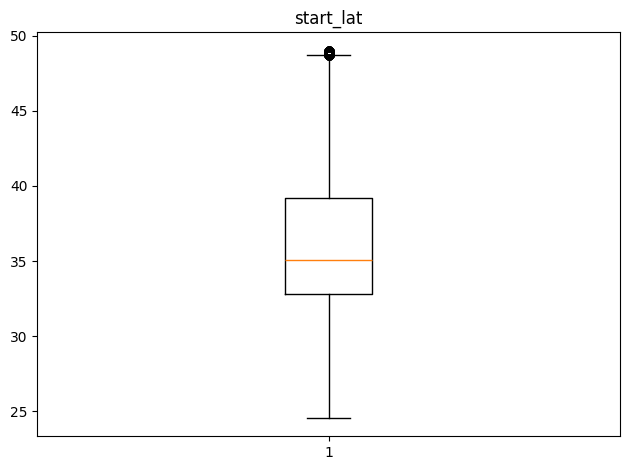

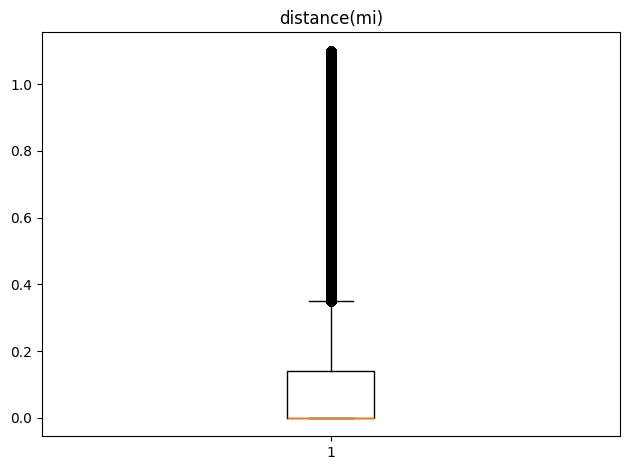

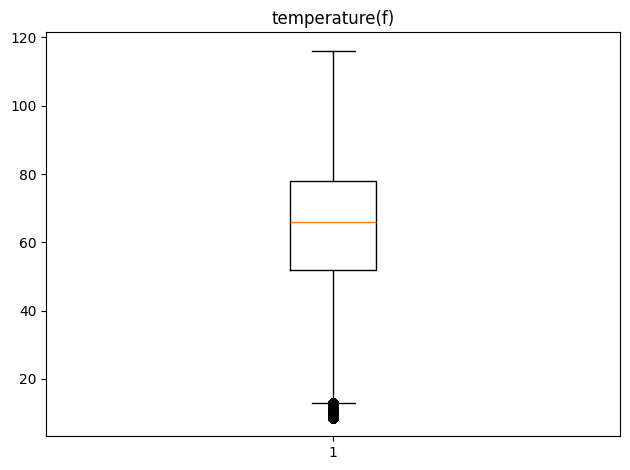

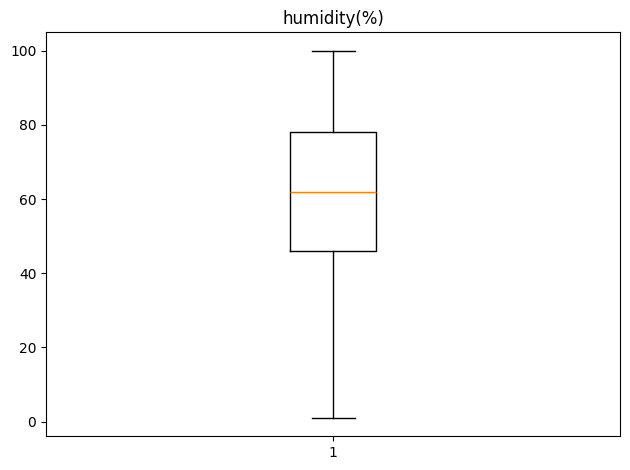

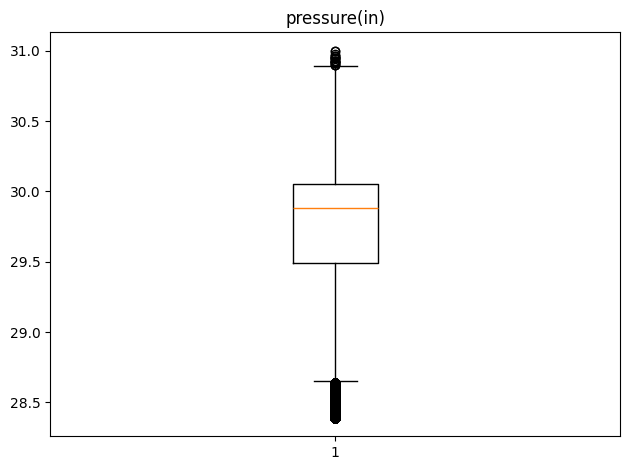

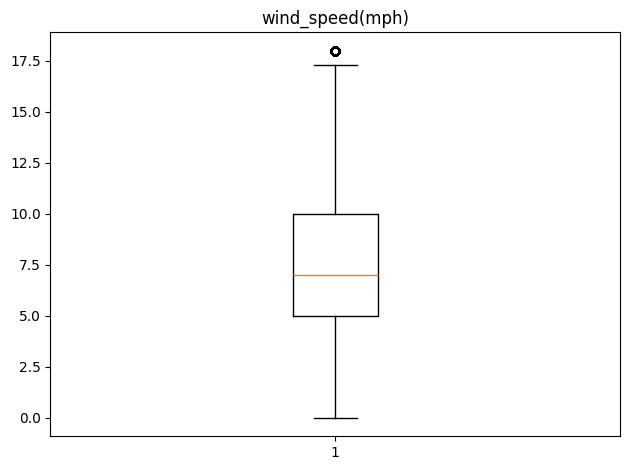

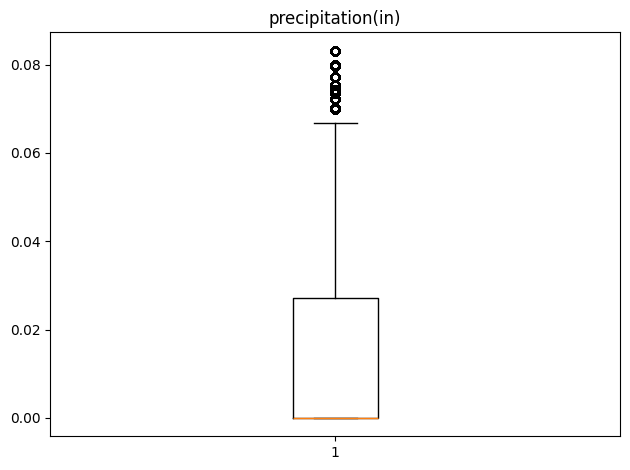

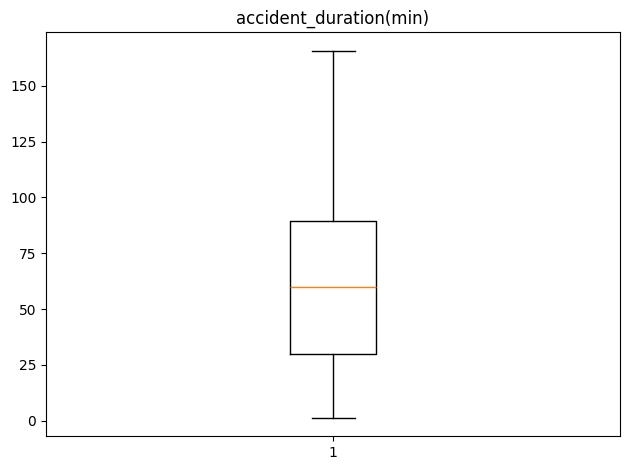

In [32]:
for col in ['start_lat', 'distance(mi)', 'temperature(f)', 'humidity(%)', 'pressure(in)', 'wind_speed(mph)', 'precipitation(in)', 'accident_duration(min)',]:
    plot_box(df=df, feature_name=col)

In [35]:
# df['severity'] = df['severity'].astype('object')
# categorical_cols_name = df.select_dtypes(include=['object', 'bool']).columns
# df[categorical_cols_name] = df[categorical_cols_name].astype('category')
numerical_cols_name = df.select_dtypes(include=['float32', 'float64', 'int32', 'int64']).columns

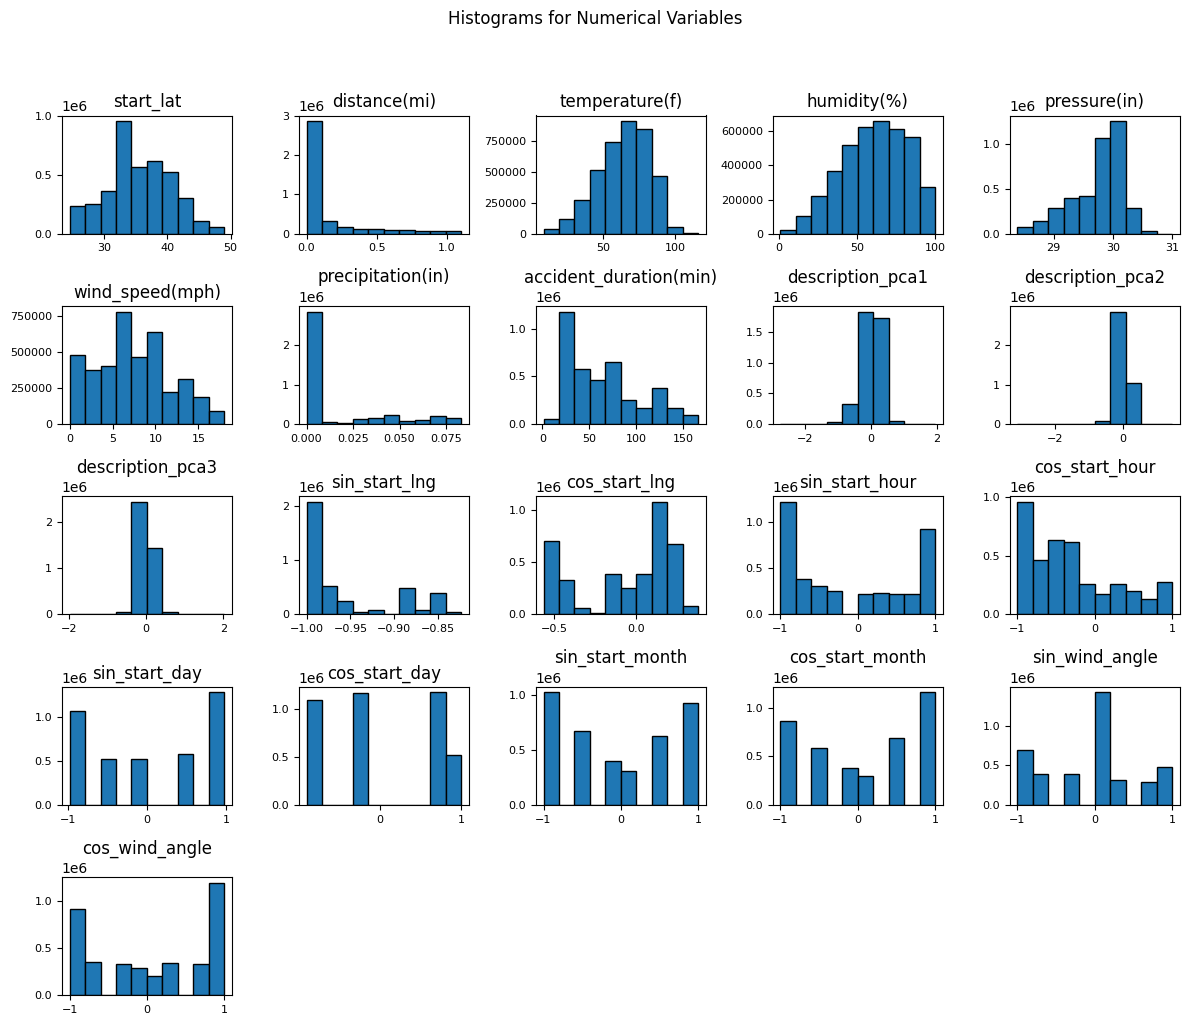

In [37]:
df[numerical_cols_name].hist(bins=10, figsize=(12, 10), grid=False, xlabelsize=8, ylabelsize=8,  edgecolor='black')
plt.suptitle('Histograms for Numerical Variables', y=1.02, fontsize=12)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "features_histograms.png", dpi=500)
plt.show()
plt.close()

In [38]:
df_raw = pd.read_csv(RAW_DATA_DIR / "US_Accidents_March23.csv")

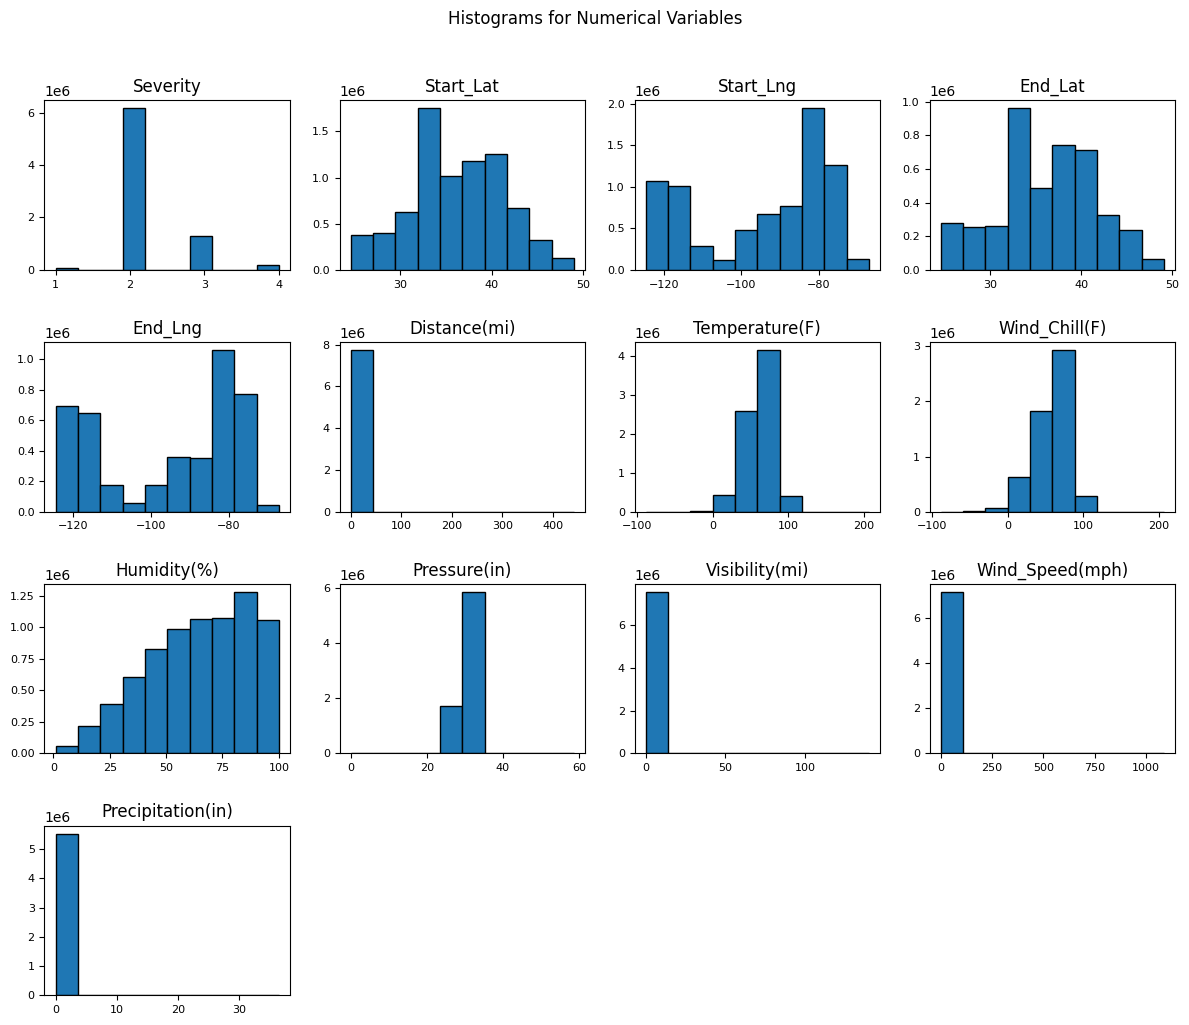

In [39]:
numerical_cols_name = df_raw.select_dtypes(include=['float32', 'float64', 'int32', 'int64']).columns

df_raw[numerical_cols_name].hist(bins=10, figsize=(12, 10), grid=False, xlabelsize=8, ylabelsize=8,  edgecolor='black')
plt.suptitle('Histograms for Numerical Variables', y=1.02, fontsize=12)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "features_histograms.png", dpi=500)
plt.show()
plt.close()

### Embedding with OpenAI

In [ ]:
# import os
# import pandas as pd
# from openai import OpenAI
# from sklearn.decomposition import PCA

# def description_embedding(parquet_file_path: str, pca_dimension: int=4, csv_file_path: str="") -> None:
#     df = pd.read_parquet(parquet_file_path)
#     client = OpenAI(api_key=os.environ.get('OPEN_API_KEY'))
    
#     response = client.embeddings.create(
#         input=df['description'].tolist(),
#         model="text-embedding-ada-002"
#     )
    
#     embeddings = [emb.embedding for emb in response.data]
#     vector_df = pd.DataFrame({
#         f'vect_{i+1}': [emb[i] for emb in embeddings] for i in range(len(embeddings[0]))
#     })
    
#     pca = PCA(n_components=pca_dimension)
#     pca_result = pca.fit_transform(vector_df)
    
#     for i in range(pca_dimension):
#         df[f'description_pca{i+1}'] = pca_result[:, i]
    
#     df.drop(columns=['description'], inplace=True)
    
#     df.to_csv(csv_file_path, index=False)
#     print(f"Embeddings et PCA sauvegardés !!")



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données extraites de l'image
x_values = [0.1, 0.3, 0.5, 0.8, 1]

# R2 scores
r2_train = {
    "Linear": [0.27, 0.27, 0.27, 0.27, 0.27],
    "xgboost": [0.68, 0.62, 0.63, 0.61],
    "lightgbm": [0.54, 0.53, 0.53, 0.53],
    "catboost": [0.6, 0.57, 0.56],
    "randomF": [0.93, 0.94]
}

r2_test = {
    "Linear": [0.27, 0.28, 0.27, 0.27, 0.27],
    "xgboost": [0.53, 0.55, 0.55, 0.56],
    "lightgbm": [0.51, 0.52, 0.52, 0.52],
    "catboost": [0.53, 0.54, 0.54],
    "randomF": [0.53, 0.55]
}

# MSE values
mse_train = {
    "Linear": [32.18, 32.17, 32.13, 32.14, 32.15],
    "xgboost": [21.16, 23.17, 22.93, 23.44],
    "lightgbm": [25.52, 25.7, 25.9, 25.9],
    "catboost": [23.6, 24.7, 24.9],
    "randomF": [9.66, 9.4]
}

mse_test = {
    "Linear": [32.14, 32.1, 32.14, 32.11, 32.15],
    "xgboost": [25.71, 25.34, 25.1, 24.92],
    "lightgbm": [26.3, 26, 26, 25.9],
    "catboost": [25.8, 25.5, 25.4],
    "randomF": [25.8, 25.11]
}

# Tracer les courbes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Fonction pour tracer
def plot_metric(ax, data, title, ylabel):
    for model, values in data.items():
        ax.plot(x_values, values, marker='o', label=model)
    ax.set_title(title)
    ax.set_xlabel("Proportion des données")
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# R2 ajusté
plot_metric(axes[0, 0], r2_train, "R2 Ajusté - Train", "R2")
plot_metric(axes[0, 1], r2_test, "R2 Ajusté - Test", "R2")

# MSE
plot_metric(axes[1, 0], mse_train, "MSE - Train", "MSE")
plot_metric(axes[1, 1], mse_test, "MSE - Test", "MSE")

plt.tight_layout()
plt.show()


In [9]:
import matplotlib.pyplot as plt

# Données extraites de l'image
x_values = [0.1, 0.3, 0.5, 0.8, 1]

# R2 scores
r2_train = {
    "Linear": [0.27, 0.27, 0.27, 0.27, 0.27],
    "XGBoost": [0.68, 0.62, 0.63, 0.61],
    "LightGBM": [0.54, 0.53, 0.53, 0.53],
    "CatBoost": [0.6, 0.57, 0.56],
    "RandomForest": [0.93, 0.94]
}

r2_test = {
    "Linear": [0.27, 0.28, 0.27, 0.27, 0.27],
    "XGBoost": [0.53, 0.55, 0.55, 0.56],
    "LightGBM": [0.51, 0.52, 0.52, 0.52],
    "CatBoost": [0.53, 0.54, 0.54],
    "RandomForest": [0.53, 0.55]
}

# RMSE values
rmse_train = {
    "Linear": [32.18, 32.17, 32.13, 32.14, 32.15],
    "XGBoost": [21.16, 23.17, 22.93, 23.44],
    "LightGBM": [25.52, 25.7, 25.9, 25.9],
    "CatBoost": [23.6, 24.7, 24.9],
    "RandomForest": [9.66, 9.4]
}

rmse_test = {
    "Linear": [32.14, 32.1, 32.14, 32.11, 32.15],
    "XGBoost": [25.71, 25.34, 25.1, 24.92],
    "LightGBM": [26.3, 26, 26, 25.9],
    "CatBoost": [25.8, 25.5, 25.4],
    "RandomForest": [25.8, 25.11]
}

# Tracer les courbes
# fig, axes = plt.subplots(1, 2)
# # fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# # Fonction pour tracer en ignorant les valeurs manquantes
# def plot_metric(ax, data, title, ylabel):
#     for model, values in data.items():
#         x_vals = x_values[:len(values)]  # Sélectionner les x correspondants aux valeurs disponibles
#         ax.plot(x_vals, values, marker='o', label=model)
#     ax.set_title(title)
#     ax.set_xlabel("Proportion des données")
#     ax.set_ylabel(ylabel)
#     ax.legend()
#     ax.grid(True)

# # R2 ajusté
# plot_metric(axes[0], r2_train, "R2 Ajusté - Train", "R2")
# plot_metric(axes[1], r2_test, "R2 Ajusté - Test", "R2")

# # RMSE
# # plot_metric(axes[1, 0], rmse_train, "RMSE - Train", "RMSE")
# # plot_metric(axes[1, 1], rmse_test, "RMSE - Test", "RMSE")

# plt.tight_layout()
# plt.show()


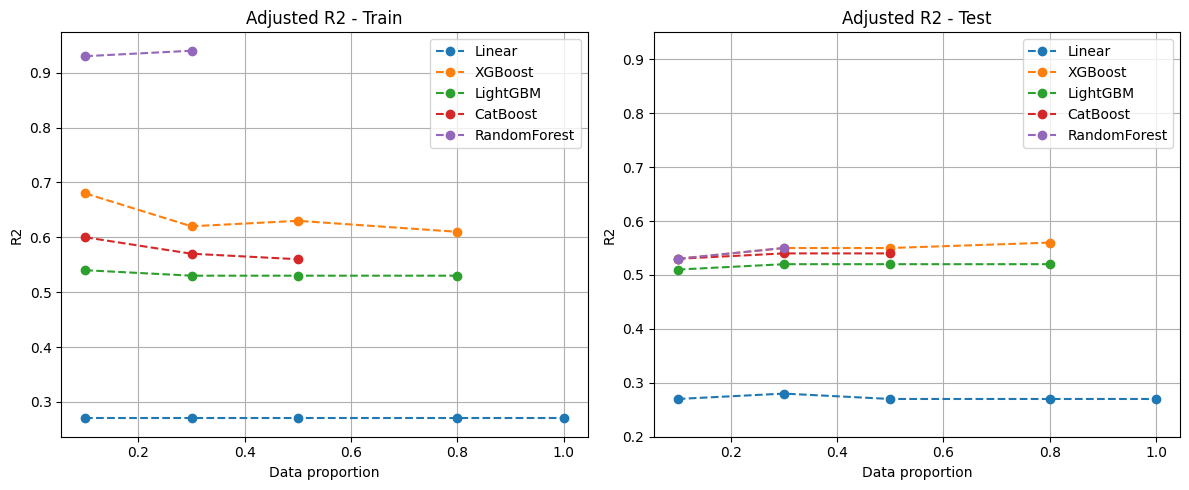

In [ ]:
def plot_r2():
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for ax, data, title in zip(axes, [r2_train, r2_test], ["Adjusted R2 - Train", "Adjusted R2 - Test"]):
        for model, values in data.items():
            x_vals = x_values[:len(values)]
            ax.plot(x_vals, values, marker='o', linestyle='--', label=model)
        ax.set_title(title)
        ax.set_xlabel("Data proportion")
        ax.set_ylabel("R2")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()
plot_r2()

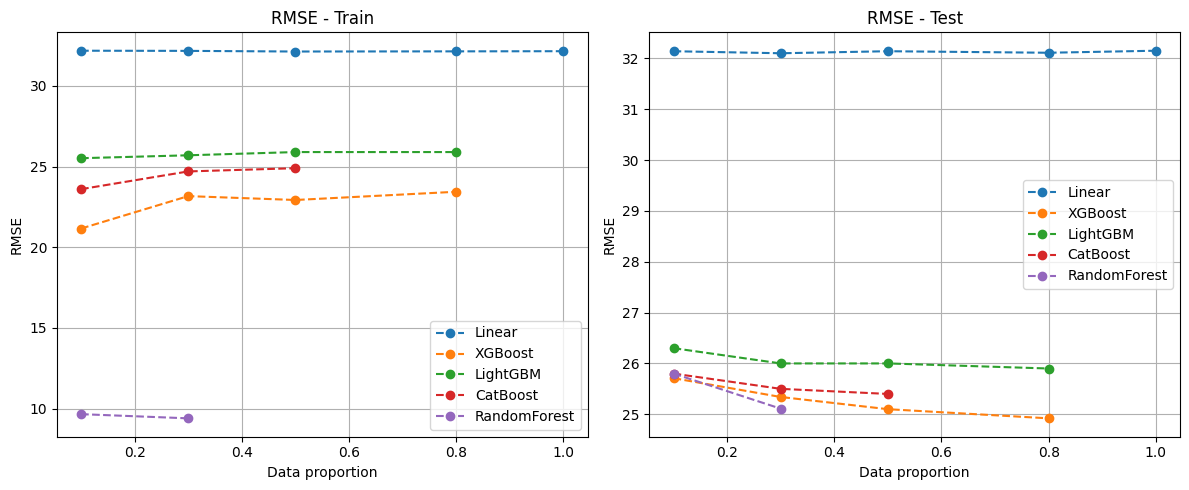

In [11]:
def plot_rmse():
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    for ax, data, title in zip(axes, [rmse_train, rmse_test], ["RMSE - Train", "RMSE - Test"]):
        for model, values in data.items():
            x_vals = x_values[:len(values)]
            ax.plot(x_vals, values, marker='o', linestyle='--', label=model)
        ax.set_title(title)
        ax.set_xlabel("Data proportion")
        ax.set_ylabel("RMSE")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

plot_rmse()

## Preprocessing with PySpark on AWS EMR

The initial phase of this project involved preprocessing the US car accident dataset, which contains approximately 7.7 million records spanning from February 2016 to March 2023 across 49 states. Given the dataset’s size and complexity, we utilized an AWS EMR (Elastic MapReduce) cluster with PySpark to efficiently handle the data processing tasks. The preprocessing steps were designed to clean and transform the raw data into a suitable format for subsequent analysis and modeling, specifically to predict accident duration and its impact on traffic flow.

The preprocessing workflow consisted of several key steps. First, we loaded the dataset from a CSV file stored in an S3 bucket and standardized the column names to lowercase for consistency. Unnecessary columns—such as `id`, `end_lat`, `end_lng`, and `wind_chill(f)`—were removed to streamline the dataset. Next, we addressed missing values in critical columns like `precipitation(in)` and `wind_speed(mph)` by filling them with monthly averages calculated based on the accident start time. This ensured that gaps in weather-related data were handled contextually rather than left as nulls. Rows with remaining null values across any column were then dropped to maintain data integrity.

To prepare the dataset for time-based analysis, we processed the `start_time` and `end_time` columns by converting them to timestamps and calculating the accident duration in minutes. Additionally, we extracted temporal features—start hour, day, month, and year—from the `start_time` to enrich the dataset with time-related insights. These features are essential for understanding patterns in accident duration and traffic impact.

Outlier detection and removal were also critical steps to ensure the dataset’s reliability. We focused on key numerical columns—`distance(mi)`, `temperature(f)`, `pressure(in)`, `visibility(mi)`, `wind_speed(mph)`, `precipitation(in)`, and the newly computed `accident_duration(min)`—and computed whiskers (lower and upper bounds) using the interquartile range (IQR) method with approximate quantiles. Records falling outside these bounds were filtered out to eliminate extreme values that could skew the analysis.

Finally, the preprocessed dataset was saved as a Parquet file in an S3 bucket, coalesced into a single partition for simplicity. The process was logged throughout, with the log file uploaded alongside the output data for transparency and debugging purposes. This preprocessing effort reduced noise, enhanced data quality, and set the stage for accurate modeling of accident duration.


## Text Processing with Doc2Vec

Following the initial preprocessing with PySpark, the next step involved handling the textual data within the dataset, specifically the `description` column containing details about each accident. Given the large volume of data—approximately 7.7 million records—using advanced embedding models like OpenAI’s `text-embedding-ada-002` was deemed impractical due to computational and cost constraints. Instead, we adopted a traditional yet effective vectorization approach using `Doc2Vec`, a model from the Gensim library, to transform the text into numerical representations suitable for downstream modeling.

The text processing workflow began by loading the preprocessed dataset from a Parquet file generated by the PySpark job on AWS EMR. We first normalized the categorical features to ensure consistency across the dataset. The `visibility(mi)` column was dropped as it was deemed non-essential for this phase. Integer-based columns—such as `severity`, `start_hour`, `start_day`, `start_month`, and `start_year`—were converted to a categorical type, while object and boolean columns were similarly transformed. All categorical values were then standardized by converting them to lowercase and stripping whitespace.

The core of the text processing focused on the `description` column. We tokenized the text by converting it to lowercase, removing punctuation, and splitting it into individual words. Non-alphabetical tokens were filtered out, and the remaining words were processed by removing stopwords (common words like "the" or "and") and applying lemmatization to reduce words to their root form (e.g., "running" to "run"). This resulted in a clean set of tokens for each accident description, ready for vectorization.

To convert these tokens into numerical embeddings, we trained a `Doc2Vec` model with a vector size of 100, a window size of 5, and 20 epochs, using the distributed memory (DM) approach. The model was trained on tagged documents, where each tokenized description was paired with a unique identifier. Once trained, the model generated 100-dimensional vectors capturing the semantic meaning of each description. To reduce dimensionality and improve computational efficiency, we applied Principal Component Analysis (PCA) to these vectors, retaining the top three components. These PCA-derived features—labeled `description_pca1`, `description_pca2`, and `description_pca3`—were added to the dataset, while the original `description` and `tokens` columns were discarded.

The resulting dataset, now enriched with text embeddings, was saved as a Parquet file for use in subsequent modeling steps. This approach effectively transformed unstructured text into a structured format, enabling the inclusion of accident descriptions in the prediction of traffic flow impact. The process was logged throughout, with logs stored alongside the output for traceability.



## Feature Engineering

After completing the initial preprocessing and text processing phases, it became evident that an additional round of feature engineering was necessary to further refine the dataset for modeling. This step aimed to enhance the predictive power of the features by transforming, grouping, and reducing them, ensuring the dataset was optimized for forecasting accident duration and its impact on traffic flow.

The feature engineering process began by loading the dataset from the Parquet file generated in the text processing step. We first streamlined the dataset by dropping a set of columns deemed redundant or irrelevant for the analysis. These included metadata like `weather_timestamp`, `airport_code`, `country`, and `source`, as well as location-specific details such as `street`, `city`, `county`, and `zipcode`. Additionally, binary road condition flags—such as `amenity`, `bump`, `crossing`, and `traffic_signal`—and twilight-related columns were removed to reduce dimensionality. Outliers in the `accident_duration(min)` column were also filtered out to ensure the target variable remained robust.

To capture the periodic nature of temporal and spatial features, we applied cyclic encoding using sine and cosine transformations. The `start_lng` (longitude) was encoded with a period of 360 degrees, while `start_hour` (24-hour cycle), `start_day` (7-day week), and `start_month` (12-month year) were similarly transformed. The original columns were then dropped, leaving pairs of sine and cosine features that effectively represent these cyclical patterns without assuming linear relationships. For the `wind_direction` column, textual values (e.g., "north", "east", "calm") were mapped to corresponding angles (in degrees), cyclically encoded with a 360-degree period, and then replaced with their sine and cosine components.

Next, we grouped categorical features to simplify the dataset and enhance interpretability. The `state` column, representing the 49 states in the dataset, was categorized into `urban`, `rural`, or `unknown` based on a predefined list of urban and rural states. This reduced the granularity while preserving meaningful distinctions in traffic and accident patterns. Similarly, the `weather_condition` column, which contained a wide range of detailed weather descriptions, was mapped into four broader groups: `clear`, `cloudy`, `precipitation`, and `obscured`. Unmapped conditions were labeled as `unknown`. These groupings reduced noise and consolidated related conditions into more manageable categories.

The final dataset, now transformed and enriched, was saved as a Parquet file. This process resulted in a cleaner, more focused set of features, with reduced dimensionality and improved representation of temporal, spatial, and environmental factors. The feature engineering phase ensured the data was well-prepared for modeling, balancing complexity and predictive potential. Logs were maintained throughout the process and stored alongside the output for reference.


## Modeling

With the dataset fully preprocessed and enriched through feature engineering, the next phase focused on training predictive models to forecast accident duration and assess its impact on traffic flow. To achieve this, we developed training pipelines for five distinct regression models: Linear Regression, Random Forest, XGBoost, CatBoost, and LightGBM. These pipelines were designed not only to train the models but also to optimize their hyperparameters, evaluate performance, and save the results—including metrics and visualizations—for further analysis.

The modeling process began by loading the final preprocessed dataset from a Parquet file. To accommodate potential computational constraints, we allowed for sampling a fraction of the data (defaulting to 100%), ensuring flexibility in experimentation. The dataset was split into features (`X`) and the target variable (`accident_duration(min)`), with an 80-20 train-test split applied to reserve 20% of the data for testing. Numerical features were standardized using a `StandardScaler`, while categorical features—such as `state_group` and `weather_group`—were one-hot encoded (dropping the first category to avoid multicollinearity). This preprocessing was integrated into a `ColumnTransformer` within each pipeline to ensure consistent data preparation.

For each model, we employed `RandomizedSearchCV` to tune hyperparameters efficiently, performing a randomized search over predefined parameter distributions with 20 iterations and 5-fold cross-validation. The scoring metric was set to negative root mean squared error (RMSE) to prioritize minimizing prediction errors. The models and their tuned parameters were as follows:
- **Linear Regression**: No hyperparameters were tuned, serving as a baseline.
- **Random Forest**: Tuned `n_estimators` (100–500), `max_depth` (10–30 or None), and `min_samples_split` (2–10).
- **XGBoost**: Tuned `n_estimators` (100–300), `learning_rate` (0.01–0.1), and `max_depth` (4–10).
- **CatBoost**: Tuned `iterations` (100–500), `learning_rate` (0.01–0.1), and `depth` (4–10).
- **LightGBM**: Tuned `n_estimators` (100–300), `learning_rate` (0.01–0.1), and `max_depth` (6–12).

Each pipeline was executed individually, leveraging parallel processing to optimize computational efficiency. After training, the best-performing model (based on cross-validation) was evaluated on both the training and test sets. Key metrics included adjusted R² (accounting for the number of features) and RMSE, providing insights into model fit and prediction accuracy. These metrics were logged for each model, along with the fraction of data used, to facilitate comparison.

Beyond performance metrics, we analyzed feature importance and residuals to deepen our understanding of each model’s behavior. For Linear Regression, feature importance was derived from coefficient magnitudes and accompanying p-values (calculated via `statsmodels`), while for tree-based models (Random Forest, XGBoost, CatBoost, LightGBM), it was based on built-in feature importance scores. These results were saved as Excel files. Residual analysis included histograms, scatter plots against predicted values, and Q-Q plots to assess normality and autocorrelation, with the Durbin-Watson statistic computed to detect residual patterns. These visualizations were saved as PNG files for later review.

The trained pipelines, optimized with their best hyperparameters, were serialized and saved as `.pkl` files, named according to the model type and data fraction (e.g., `RandomForest-frac-1.0.pkl`). This ensured reproducibility and easy access for future predictions or analysis. Logs captured the entire process, including preparation, training, and evaluation steps, and were stored alongside the outputs.

This modeling phase provided a robust framework for comparing multiple regression approaches, balancing simplicity (Linear Regression) with complexity (ensemble methods), and setting the stage for a detailed performance analysis in the next section.
